# In class Random Forest Regression problem
See <a href="https://www.kaggle.com/dansbecker/random-forests">Random Forests</a> tutorial from Kaggle's excellent (and short) <a href="https://www.kaggle.com/learn/intro-to-machine-learning">Intro to Machine Learning</a> course 

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import pandas as pd
import numpy as np

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from IPython import get_ipython
ipython = get_ipython()

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# Set max rows and columns displayed in jupyter
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)

#the following gives access to utils folder
#where utils package stores shared code
import os
import sys
PROJECT_ROOT = os.path.abspath(os.path.join(
                  os.getcwd(),
                  os.pardir)
)

#only add it once
if (PROJECT_ROOT not in sys.path):
    sys.path.append(PROJECT_ROOT)

# autoreload extension
if 'autoreload' not in ipython.extension_manager.loaded:
    %load_ext autoreload

%autoreload 2

## Load Data


In [47]:
df = pd.read_csv("../datasets/melb_data.csv")
# df.head()
print(f'there are {len(df)} rows in df')

there are 13580 rows in df


## BTW if you are doing EDA or model building AND your dataset is large then work with a randomly sampled fraction of the data.

This will hugely speed up EDA and model training.  You should do this every time when you first start working with a dataset, especially if it's a large one.

In [48]:
df=df.sample( frac=.1, replace=False, weights=None, random_state=42)
print(f'there are {len(df)} rows in df')

there are 1358 rows in df


In [49]:
#clean up the index
df.reset_index(drop=True,inplace=True)

## Lets strip some columns to make this demo easier

In [51]:
#lets strip out just a few columns to make this example easier
# Choose target and features
features = ['Rooms', 'Bathroom', 'Landsize', 'BuildingArea', 
                        'YearBuilt', 'Lattitude', 'Longtitude']
X = df[features]
y = df.Price
print(f'there are {len(df)} rows in X')

there are 1358 rows in X


## Preprocess?
Don't have to do much for random forest.  Gotta handle nulls though

In [52]:
#any nulls?  If so handle
X.isnull().sum()
y.isnull().sum()

Rooms             0
Bathroom          0
Landsize          0
BuildingArea    647
YearBuilt       528
Lattitude         0
Longtitude        0
dtype: int64

0

In [53]:
X=X.fillna(value=X.mean())
y=y.fillna(value=y.mean())

In [54]:
# split data into training and validation data, for both features and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this script.
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0)

## Analysis

How are we going to see if we are right?  We cannot use accuracy here like we did for classification since we are prdicting a floating point number, and even if 2 floating point numbers are very close, in a boolean expression they will not be equal (ex 0.002 != 0.002001).

So what to do?  Measure the difference between the true value and the predicted value or each point, sum these differences, and then divide by the number of points.  This is called the <mark>mean_absolute_error</mark> and it's given by the formula below.
![](./mae_form.png)


### First lets see what the mean_absolute_error is for a decision tree

In [69]:
from sklearn.metrics import accuracy_score
from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state=42)
_=clf.fit(train_X, train_y)
predst = clf.predict(val_X)

#why can't we use accuracy?  Because we are comparing floating point to floating point
#hard to get a match with that
# print(f'Accuracy ={clf.score(val_X, val_y)}')
print(mean_absolute_error(val_y, predst))

337928.90588235296


### Then for a random forest classifier

In [66]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

forest_model = RandomForestRegressor(random_state=42)
_=forest_model.fit(train_X, train_y)
preds = forest_model.predict(val_X)
print(mean_absolute_error(val_y, preds))

225085.05291176474


### The mean average precision for the random forest is considerably less than the decision tree 

## Visualization: Is the model more accurate for any particular feature?  Or feature value?


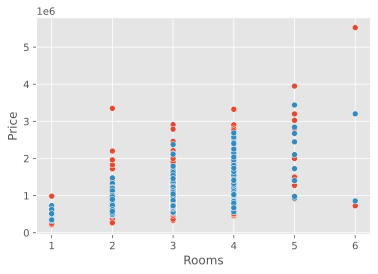

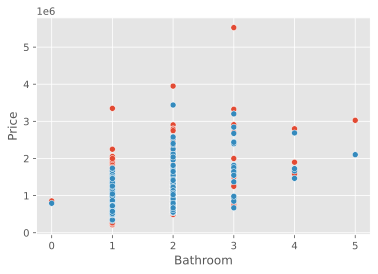

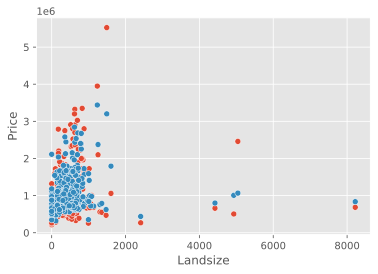

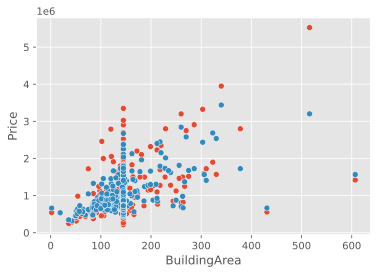

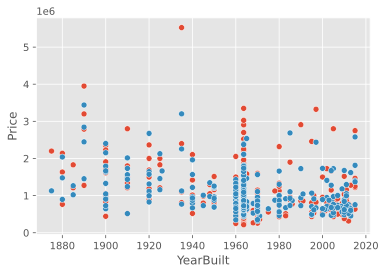

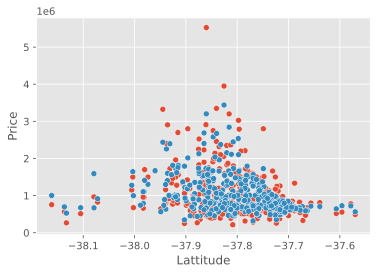

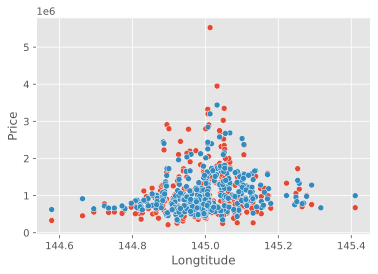

In [70]:
for col in features:
    _=plt.figure()
    _=sns.scatterplot(data=val_X,x=col,y=val_y)
    _=sns.scatterplot(data=val_X,x=col,y=preds)

### The above plots are useless, is there a better way?